In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [131]:
origin = pd.read_excel("./data/poll.xlsx")
origin.head()

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


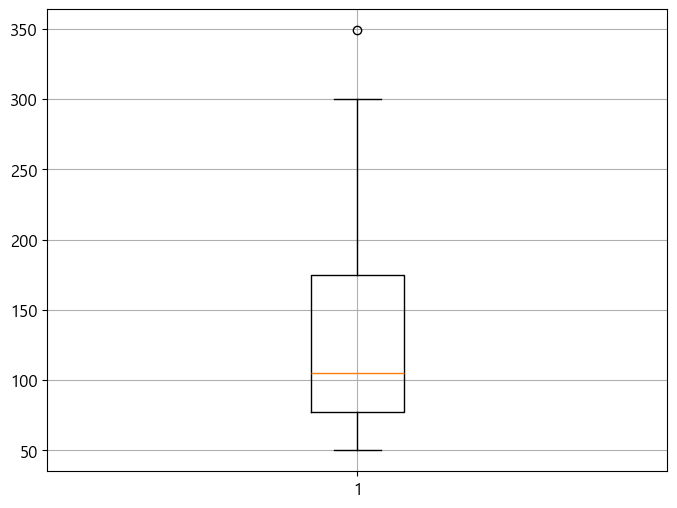

In [132]:
plt.figure()
plt.boxplot(origin['월수입'])
plt.grid()
plt.show()

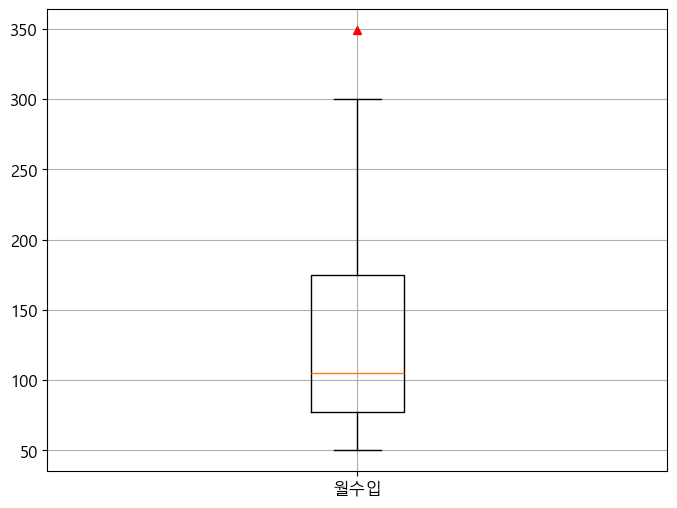

In [133]:
plt.figure()
plt.boxplot(origin['월수입'], sym="r^")
plt.xticks([1], ['월수입'])
plt.grid()
plt.show()
plt.close()

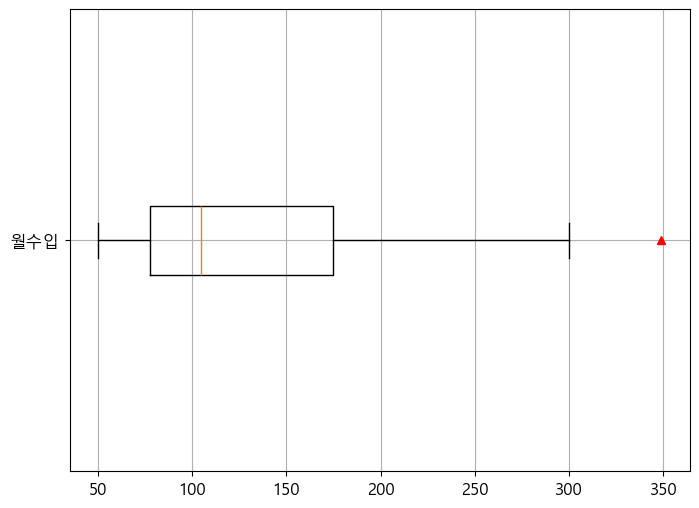

In [134]:
plt.figure()
plt.boxplot(origin['월수입'], sym="r^", vert=0)
plt.yticks([1], ['월수입'])
plt.grid()
plt.show()
plt.close()

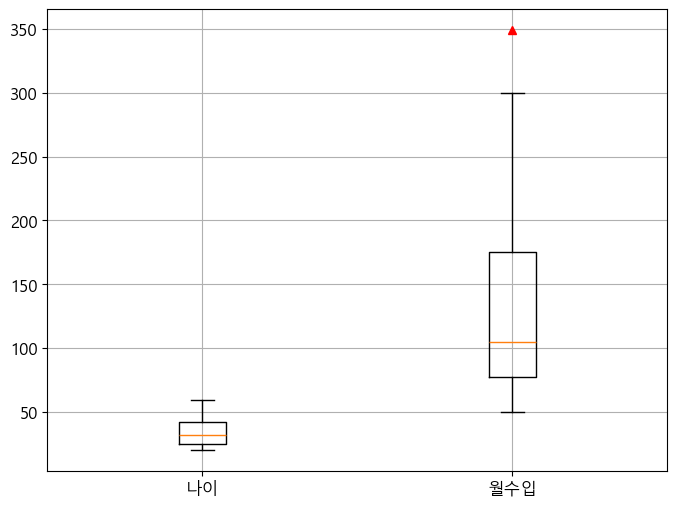

In [135]:
plt.figure()
plt.boxplot([origin['나이'], origin['월수입']], sym="r^")
plt.xticks([1, 2], ['나이', '월수입'])
plt.grid()
plt.show()
plt.close()

- Pie Plot

In [136]:
sexRatio = origin['성별'].value_counts()
sexRatio

남자    27
여자    13
Name: 성별, dtype: int64

In [137]:
data = list(sexRatio.values)
labels = list(sexRatio.index)
print("데이터 :", data)
print("라벨 :", labels)

데이터 : [27, 13]
라벨 : ['남자', '여자']


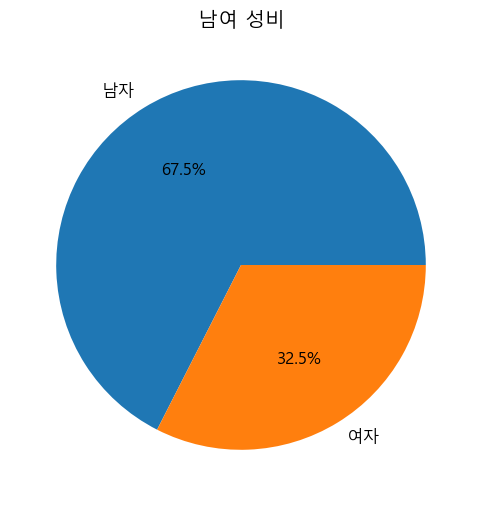

In [138]:
plt.figure()
plt.title("남여 성비")
plt.pie(data, labels = labels, autopct = '%0.1f%%')
plt.show()

In [139]:
eduRatio = origin['최종학력'].value_counts()
eduRatio

대학교     19
대학원     16
고등학교     3
초등학교     1
중학교      1
Name: 최종학력, dtype: int64

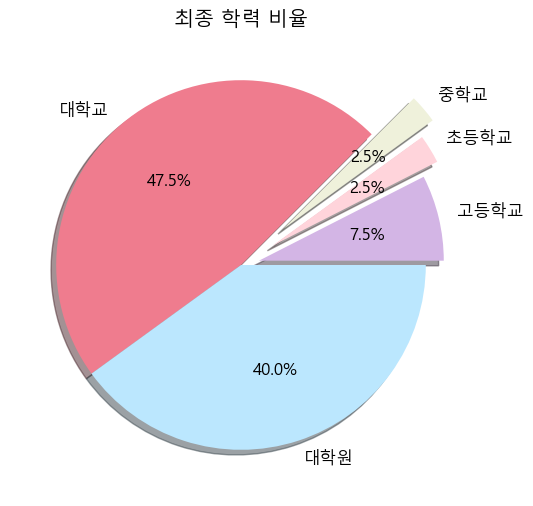

In [140]:
plt.figure()
plt.title("최종 학력 비율")
plt.pie(eduRatio.values, labels = eduRatio.index, autopct = "%0.1f%%",
        colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
        explode=[0, 0, 0.1, 0.2, 0.3],
        startangle=45,
        shadow=True)
plt.show()

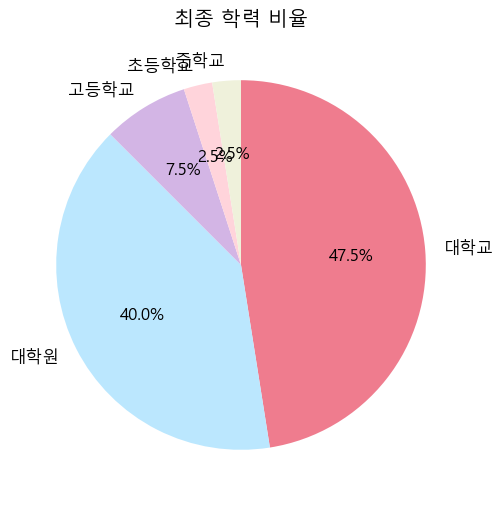

In [142]:
plt.figure()
plt.title("최종 학력 비율")
plt.pie(eduRatio.values, labels = eduRatio.index, autopct = "%0.1f%%",
        colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
        startangle=90,
        counterclock = False)
plt.show()

- Scatter Plot

In [143]:
origin2 = pd.read_excel("./data/icecream.xlsx")

In [144]:
origin2

,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


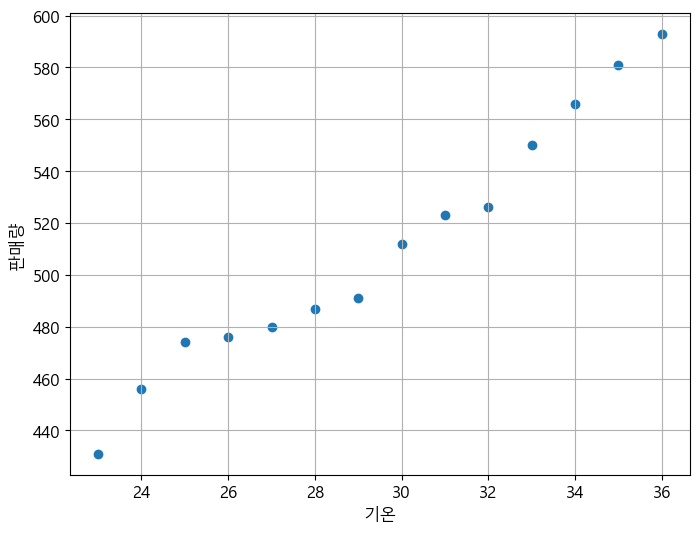

In [145]:
plt.figure()
plt.scatter(origin2['기온'], origin2['판매량'])
plt.xlabel("기온")
plt.ylabel("판매량")
plt.grid()
plt.show()

- 추세선 그리기
  - 간단한 것은 numpy로도 가능
    - np.polyfit(x, y, n)
    - x, y : x, y 데이터
    - n : 차수 (1, 2...차)
  - 가중치(기울기, 계수), 편향(절편, 상수항)을 구함

In [146]:
z = np.polyfit(origin2['기온'], origin2['판매량'], 1)
z

array([ 11.3978022 , 174.19340659])

- poly1d : 1차 방정식 구현

In [147]:
f = np.poly1d(z)
x = 40
f(x)

630.1054945054944

In [148]:
x = origin2['기온']
y = f(x)

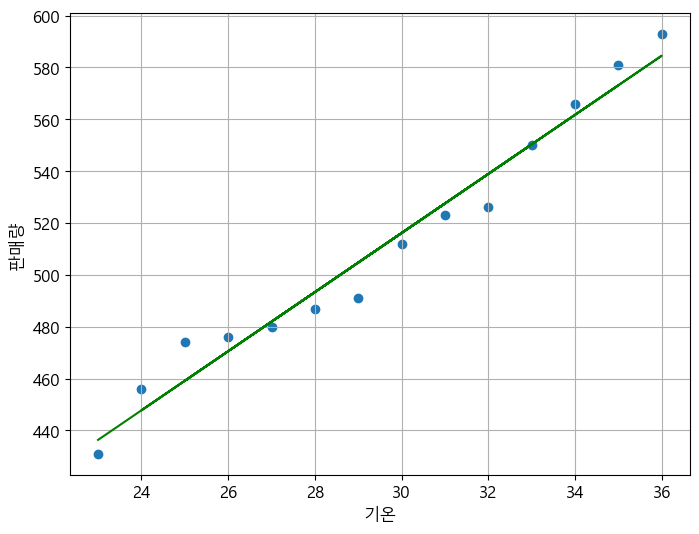

In [149]:
plt.figure()
plt.scatter(origin2['기온'], origin2['판매량'])
plt.plot(x, y, color = "green")
plt.xlabel("기온")
plt.ylabel("판매량")
plt.grid()
plt.show()

- 연습문제 1

In [150]:
df1 = pd.read_excel("./data/poll.xlsx")
df1.head()

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


In [151]:
df1['나이대'] = (df1['나이'] // 10 * 10).astype("str") + "대"

In [152]:
df1.head()

,성별,결혼상태,나이,최종학력,월수입,나이대
0,남자,기혼,21,대학교,60,20대
1,남자,기혼,22,대학원,100,20대
2,남자,기혼,33,대학교,200,30대
3,여자,미혼,33,대학교,120,30대
4,남자,미혼,28,대학교,70,20대


In [153]:
age_1 = df1['나이대'].value_counts()

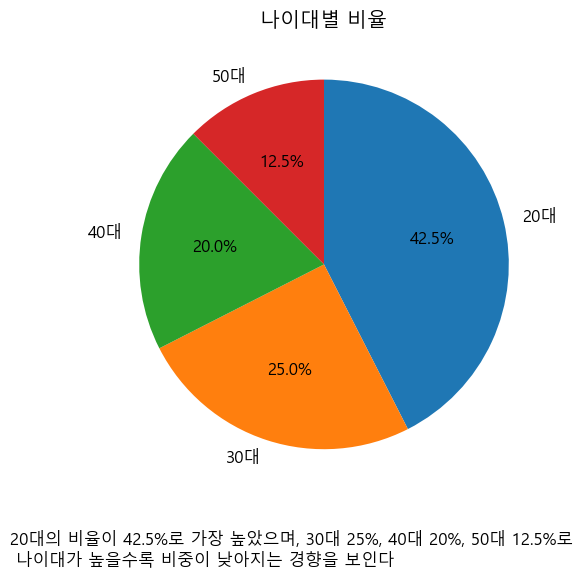

In [176]:
plt.figure()
plt.title("나이대별 비율")
plt.pie(age_1.values, labels = age_1.index, autopct = '%0.1f%%', startangle = 90, counterclock = False)
plt.figtext(0.12, 0, "20대의 비율이 42.5%로 가장 높았으며, 30대 25%, 40대 20%, 50대 12.5%로\n 나이대가 높을수록 비중이 낮아지는 경향을 보인다", wrap = True)
plt.savefig("./img/0105_1.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 20대의 비율이 42.5%로 가장 높았으며, 30대 25%, 40대 20%, 50대 12.5%로 나이대가 높을수록 비중이 낮아지는 경향을 보인다

- 연습문제 2

In [155]:
df1['소득구분'] = 0
df1.loc[df1['월수입'] < 100, '소득구분'] = '저소득'
df1.loc[df1['월수입'] >= 100, '소득구분'] = '보통'
df1.loc[df1['월수입'] >= 250, '소득구분'] = '고소득'

In [156]:
pay = df1['소득구분'].value_counts()

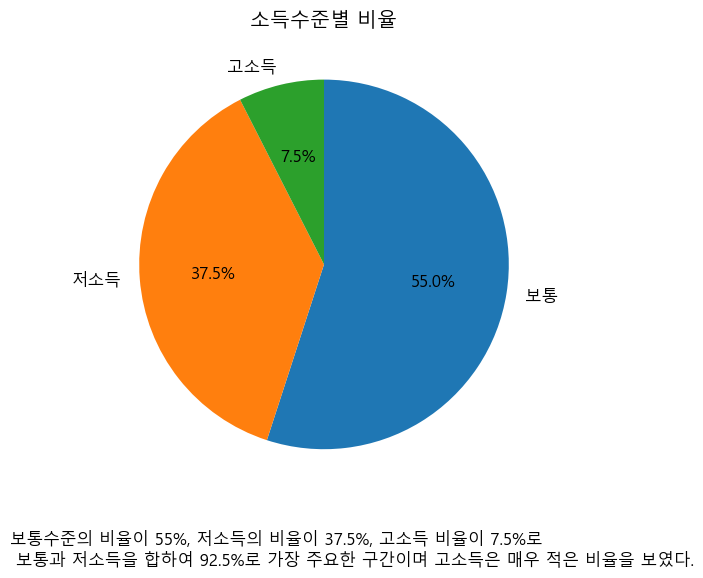

In [157]:
plt.figure()
plt.title("소득수준별 비율")
plt.pie(pay.values, labels = pay.index, autopct = '%0.1f%%', startangle = 90, counterclock = False)
plt.figtext(0.12, 0, "보통수준의 비율이 55%, 저소득의 비율이 37.5%, 고소득 비율이 7.5%로\n 보통과 저소득을 합하여 92.5%로 가장 주요한 구간이며 고소득은 매우 적은 비율을 보였다.", wrap = True)
plt.savefig("./img/0105_2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 보통수준의 비율이 55%, 저소득의 비율이 37.5%, 고소득 비율이 7.5%로 보통과 저소득을 합하여 92.5%로 가장 주요한 구간이며 고소득은 매우 적은 비율을 보였다.

- 연습문제 3

In [158]:
z1 = np.polyfit(df1['나이'], df1['월수입'], 1)
f1 = np.poly1d(z1)
x1 = df1['나이']
y1 = f1(x1)

In [159]:
x2 = [20, 25, 30, 35, 40, 45, 50]
y2 = f1(x2)

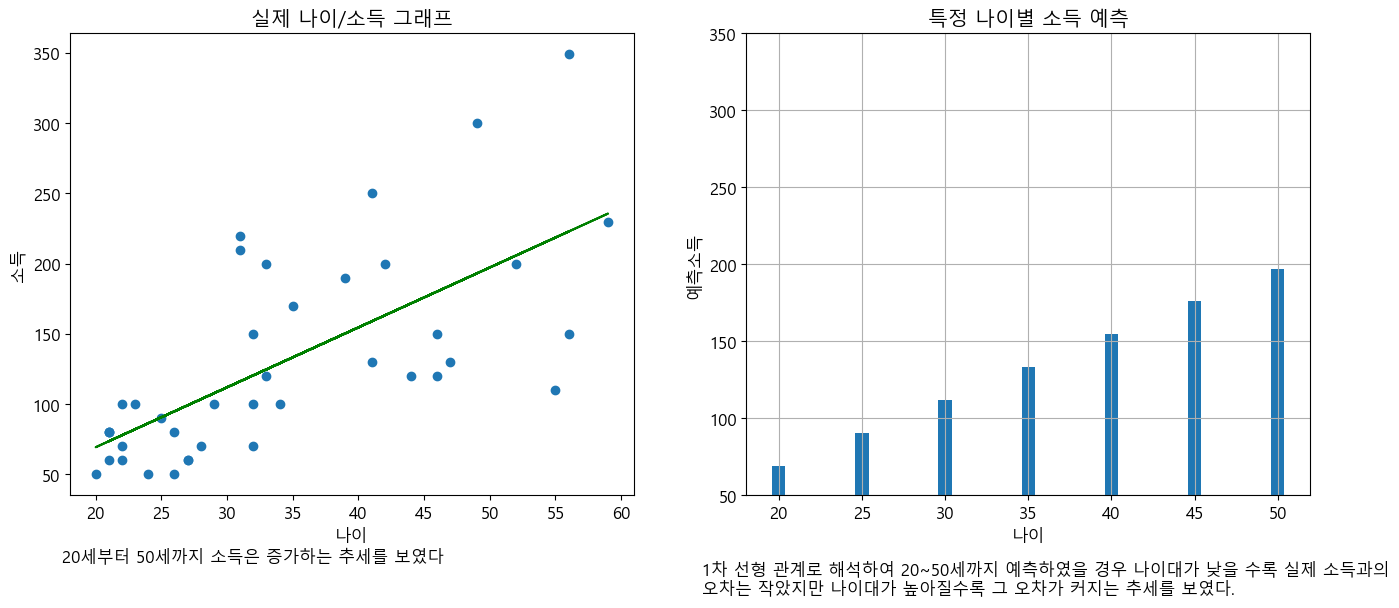

In [168]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title("실제 나이/소득 그래프")
plt.scatter(df1['나이'], df1['월수입'])
plt.plot(x1, y1, color = "green")
plt.xlabel("나이")
plt.ylabel("소득")
plt.figtext(0.12, 0, "20세부터 50세까지 소득은 증가하는 추세를 보였다", wrap = True)
plt.subplot(1, 2, 2)
plt.title("특정 나이별 소득 예측")
plt.bar(x2, y2)
plt.xlabel("나이")
plt.ylabel("예측소득")
plt.ylim(50, 350)
plt.figtext(0.52, -0.05, "1차 선형 관계로 해석하여 20~50세까지 예측하였을 경우 나이대가 낮을 수록 실제 소득과의\n오차는 작았지만 나이대가 높아질수록 그 오차가 커지는 추세를 보였다.", wrap = True)
plt.grid()
plt.savefig("./img/0105_3.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 20세부터 50세까지 소득은 증가하는 추세를 보였으며, 이를 1차 선형 관계로 해석하여 20~50세까지 예측하였을 경우 나이대가 낮을 수록 실제 소득과의 오차는 작았지만 나이대가 높아질수록 그 오차가 커지는 추세를 보였다.

- 연습문제 4

In [161]:
df4 = pd.read_excel("./data/jobs_by_scale.xlsx")

In [162]:
df4['평균'] = (df4[2015] + df4[2016]) / 2

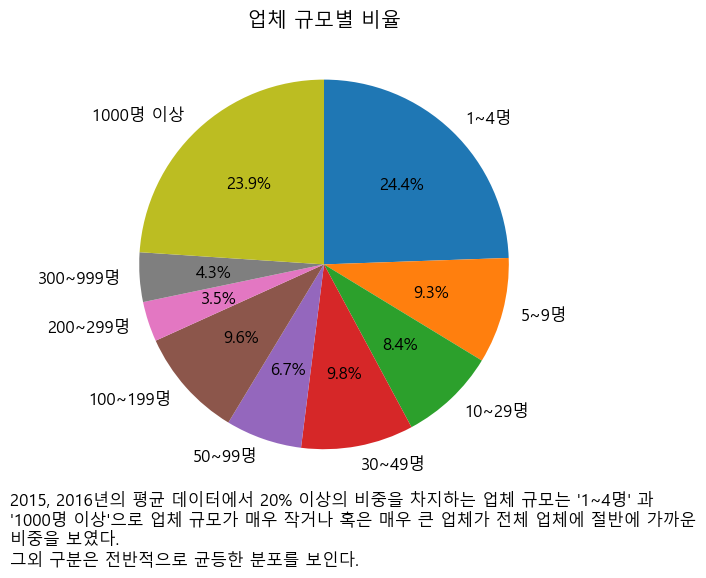

In [163]:
plt.figure()
plt.title("업체 규모별 비율")
plt.pie(df4['평균'], labels = df4['종사자규모별'], autopct = '%0.1f%%', startangle = 90, counterclock = False)
plt.figtext(0.12, 0, "2015, 2016년의 평균 데이터에서 20% 이상의 비중을 차지하는 업체 규모는 '1~4명' 과 '1000명 이상'으로 업체 규모가 매우 작거나 혹은 매우 큰 업체가 전체 업체에 절반에 가까운 비중을 보였다.\n그외 구분은 전반적으로 균등한 분포를 보인다.", wrap = True)
plt.savefig("./img/0105_4.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 2015, 2016년의 평균 데이터에서 20% 이상의 비중을 차지하는 업체 규모는 '1~4명' 과 '1000명 이상'으로 업체 규모가 매우 작거나 혹은 매우 큰 업체가 전체 업체에 절반에 가까운 비중을 보였다. 그외 구분은 전반적으로 균등한 분포를 보인다.

- 연습문제 5

In [164]:
df5 = pd.read_excel("./data/traffic_acc.xlsx")

In [165]:
df5.corr()

,년도,월,발생건수,사망자수,부상자수
년도,1.000000e+00,9.108851e-15,0.085850,-0.782602,-0.180045
월,9.108851e-15,1.000000e+00,0.649518,0.434514,0.622396
발생건수,8.584966e-02,6.495178e-01,1.000000,0.350602,0.946701
사망자수,-7.826019e-01,4.345138e-01,0.350602,1.000000,0.551918
부상자수,-1.800454e-01,6.223955e-01,0.946701,0.551918,1.000000


In [166]:
z5 = np.polyfit(df5['발생건수'], df5['부상자수'], 1)
f5 = np.poly1d(z5)
x5 = df5['발생건수']
y5 = f5(x5)

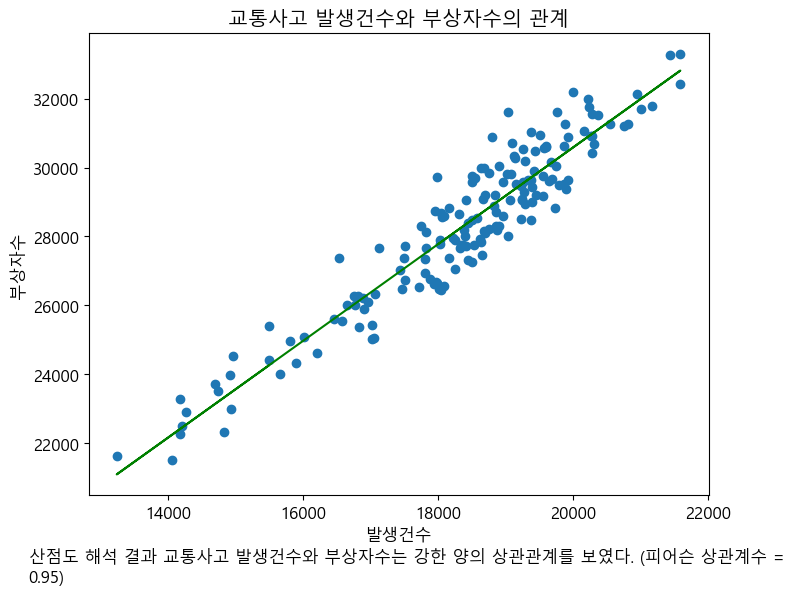

In [170]:
plt.figure()
plt.title("교통사고 발생건수와 부상자수의 관계")
plt.scatter(df5['발생건수'], df5['부상자수'])
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.plot(x5, y5, color = "green")
plt.figtext(0.05, -0.03, "산점도 해석 결과 교통사고 발생건수와 부상자수는 강한 양의 상관관계를 보였다. (피어슨 상관계수 = 0.95)", wrap = True)
plt.savefig("./img/0105_5.png", dpi = 300, bbox_inches = 'tight')
plt.show()

- 교통사고 발생건수와 부상자수는 강한 양의 상관관계를 보였다. (피어슨 상관계수 = 0.95)